
# Airbnb NYC Analysis


##  Group Members:
          Alper Giray 24077
          Buse Nur Karatepe 20929
          Çiğdem Ceyda Düzgeç 23928
          Furkan Özhan 19084
          Onur Arda Bodur 23617

<img src=https://media.giphy.com/media/VYd1jDFLRDM9q/source.gif>

In modern times, traveling is more convenient than before. Transportation and accommodation are not big issues, thanks to advanced searching tools. Travellers need a place to sleep, so they use some mobile applications such as Airbnb, Hostel.com, Booking.com etc. It is safe and easy to find a place for travelers. Those applications use data science to improve their service and search. In this project, Airbnb data will be analysed with machine learning algorithms.

![alt text](https://images.unsplash.com/photo-1534430480872-3498386e7856?ixlib=rb-1.2.1&w=1000&q=80)

Airbnb provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities. Guests can search for lodging using filters such as lodging type, dates, location, and price. Guests have the ability to search for specific types of homes, such as bed and breakfasts, unique homes, and vacation homes. Before booking, users must provide personal and payment information. Hosts provide prices and other details for their rental or event listings, such as the allowed number of guests, home type, rules, and amenities. Pricing is determined by the host, with recommendations from Airbnb. Hosts and guests have the ability to leave reviews about the experience. Airbnb acts as a broker, receiving commissions from each booking.

The project aims to analyse which factors are significantly important for the price. There are 16 columns that can have an effect on price.

This notebook follows CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology. The steps wil be as below:

1)Business understanding

2)Data understanding

3)Data preparation

4)Modeling

5)Evaluation

6)Deployment

# Step 1: Data Acquisition


## Importing Packages

In this step, Python libraries (such as panda, numpy, sklearn) that will be used throughtout the project has been imported.



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join


import folium
from folium.plugins import FastMarkerCluster
from mpl_toolkits import mplot3d
import plotly.express as px
!pip install geopandas
import geopandas

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


%matplotlib inline

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 11.8MB 7.5MB/s 
     |████████████████████████████████| 10.1MB 68.2MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Loading Data
The data from kaggle.com had mounted and dataframes had been created.

In [0]:
filename = "AB_NYC_2019.csv"
path = '/content/drive/My Drive/Cs210/Project Codes/Dataset/'
df = pd.read_csv(join(path, filename))
df_subway = pd.read_csv("/content/drive/My Drive/Cs210/Project Codes/Dataset/NYC_Transit_Subway_Entrance_And_Exit_Data.csv")
df_subway.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,NONE,NaN,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


In [0]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Step 2: Data Understanding

* Column Names with their corresponding information(dtype,length,etc.)
* Frame Shape
* Statistical Description of Data Frame
* Simple Plots
* Unique Values to our Data Set

Data understanfing plays an important role in order to prepare the data for further actions.It must be done with an extreme care in order allow further steps to work with a better accuracy.Any major error or misleading data can cause a very chaotic effect.

##Basic information about the Data Frame
This category contains:

* Column Names with their corresponding information(dtype,length,etc)
* Frame Shape

Below code gives us the information about both the column names and their corresponding dtype which plays an important role.Each column must be examined due to the fact that there might be some columns with wrong data format.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [0]:
print("Frame Shape:{}".format(df.shape))

Frame Shape:(48895, 16)


## Summary Statistics


In [0]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##Simple Plots

From the below figure it can be examined that "*latitude*" and "*longitude*" gives a map of NYC.This means the data set is available in use of Geo-Spatial Visualization which would be conducted in future steps.

In [0]:
  #sns.pairplot(df.dropna(),hue="neighbourhood_group",palette="husl")

When we sort the table in reverse order taking price as the sorting parameter,there occurs to be some outliers existing in the data which must be examined in further steps.

In [0]:
df.sort_values(by="price",ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


## Unique Values Corresponding to our Data Set

In [0]:
for e in df[["neighbourhood","neighbourhood_group","room_type","minimum_nights","number_of_reviews","availability_365"]].columns:
    print("Number of unique values of column ",e," = ",len(df[e].unique()),"\n\nValues : ",df[e].unique(),"\n\n")

Number of unique values of column  neighbourhood  =  221 

Values :  ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rocka

# Step 3: Data Preparation

In this step of this notebook,the main focus is on cleaning the data and store the cleaned version.The methods followed for the cleaning the data is stated as below: 
* Drop columns that are not relevant to the problem. Example: id, host_name etc.
* Detect missing values for each column.
* Drop or fill columns if they contain a large proportion of missing values.


It is necessary to first identify the NaN values of the corresponding column.

In [0]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Here it can be seen that "*name*" and "*host_name*" contains some empty values with a small number of quantity.We are going to copy the dataset where we might need to use it for further operations.We will fill the empty columns of names with a specific message where we would be stating that it is manually filled.

One other major problem in the data set is that there exists some empty columns with a high proportion of NaN's which needs a decision whether to fill them or drop them.

Before starting there exists an easy procedure for mapping categorical values since they are not ordinal.

In [0]:
df['neighbourhood_group']= df['neighbourhood_group'].astype("category").cat.codes
df['neighbourhood'] = df['neighbourhood'].astype("category").cat.codes
df['room_type'] = df['room_type'].astype("category").cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null int8
neighbourhood                     48895 non-null int16
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null int8
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtyp

##Skewness Of Numerical Data

Since in the further steps we plan to implement ML algorithms for price we can decrease the skewness of our data.

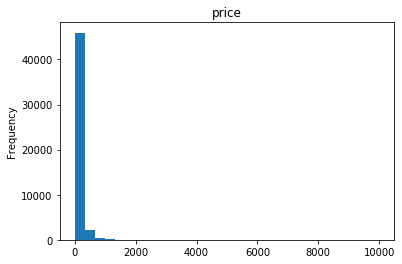

In [0]:
plt.hist(df["price"], bins=30)
plt.ylabel("Frequency")
plt.title("price")

plt.show()

Here it can be observed that there is a right skewed distribution exists on price which states us that there is a positive skewness.This condition can be fixed by using logarithmic transformation and since division by zero is a problem we can use log+1.

In [0]:
df['price_log'] = np.log(df.price+1)

We have managed to centralize the distribution of the price.

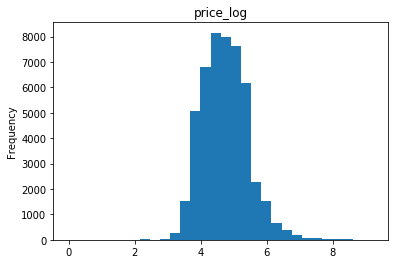

In [0]:
plt.hist(df["price_log"], bins=30)
plt.ylabel("Frequency")
plt.title("price_log")

plt.show()

## Drop columns


Before starting to manipulate the missing values,unnecessary columns can be dropped in order to gain a better view for what to do for missing values.
* As it can be observed , "id" column shows no importance to us since there exists no correlation between "id" column and other columns.
* It is also can be stated that "host_name" shows no importance for us and more importantly for ethical reasons such as preserving the privacy of the hosts it is better to drop.
* Column "last_review" must be dropped since almost 20% of the data is missing and also shows no correlative effect in the dataset for further operations.


In [0]:
df_non_changed = df
df = df.drop(columns=['name','id' ,'host_id','host_name', 'last_review'])
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

##Missing Value Handling

After dropping columns we have a clear route in order to decide what to do with missing values.

Missing Value Percentage

In [0]:

total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total','Percent'])


,Total,Percent
reviews_per_month,10052,20.56


In [0]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

We choose to fill the missing values of "*reviews_per_month*" by the mean of that column.It necessary to remember the difference that we have done in this cell since any unexpected outcome might be caused by this change.

There might still be some missing values which we haven't considered so a search will be done in order to check.

In [0]:
total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
pd.concat([total, percent], axis=1, keys=['Total','Percent'])


,Total,Percent


The missing values might be handled but we need to be cautious since there might be a value which is more likely to be impossible where it can affect our analysis.

## Checking for absurd values
The data set had 3 numeric columns written with float64, 7 with int64 , and after dropping the irrelevant columns, there were 2 float64 and 6 int64 columns.It is necessary to check these columns for any absurd instances.Example: minimum_nights column containing a negative value.

In [0]:
#Calculation of the rows which column value is 0 
print("Number of rows where (minimum_nights <= 0) :",df[df["minimum_nights"] <= 0].shape[0])
print("Number of rows where (number_of_reviews <= 0) :",df[df["number_of_reviews"] <= 0].shape[0])
print("Number of rows where (calculated_host_listings_count <= 0) :",df[df["calculated_host_listings_count"] <= 0].shape[0])
print("Number of rows where (availability_365 <= 0) :",df[df["availability_365"] <= 0].shape[0])


Number of rows where (minimum_nights <= 0) : 0
Number of rows where (number_of_reviews <= 0) : 10052
Number of rows where (calculated_host_listings_count <= 0) : 0
Number of rows where (availability_365 <= 0) : 17533


As we can see above "*minimum_nights*", "*calculated_host_listings_count*" does not contain any negative values or 0's but we can't say the same about "*number_of_reviews*" ,"*availability_365*" and "*price*" columns.

A more detailed examination can be conducted for columns came up with a value smaller equals to 0 by only removing the equality symbol that existed in the code above.

In [0]:
print("Number of rows where (number_of_reviews < 0) :",df[df["number_of_reviews"] < 0].shape[0])
print("Number of rows where (availability_365 < 0) :",df[df["availability_365"] < 0].shape[0])

Number of rows where (number_of_reviews < 0) : 0
Number of rows where (availability_365 < 0) : 0


There are no rows with negative values that affects the accuracy of our dataset but the instances that is equal to 0 must be examined.

It is not a problematic result to have "*number_of_reviews*" that equals to 0 which can be explained as the host has never been visited by an user. "*Availability_365*" can also be explained with a reasonable fact since Airbnb allows user who do not wanna give their home's in a period of time they do not cancel their accounts but choose to disable the availability of their house.

#Step 4:Explanotary Data Analysis
In this step, possible unknown relations are searched.If any existing relation discovered, it will be used in further steps.

## Price Related Data Visualization

Text(0.5, 1, 'Correlation Matrix')

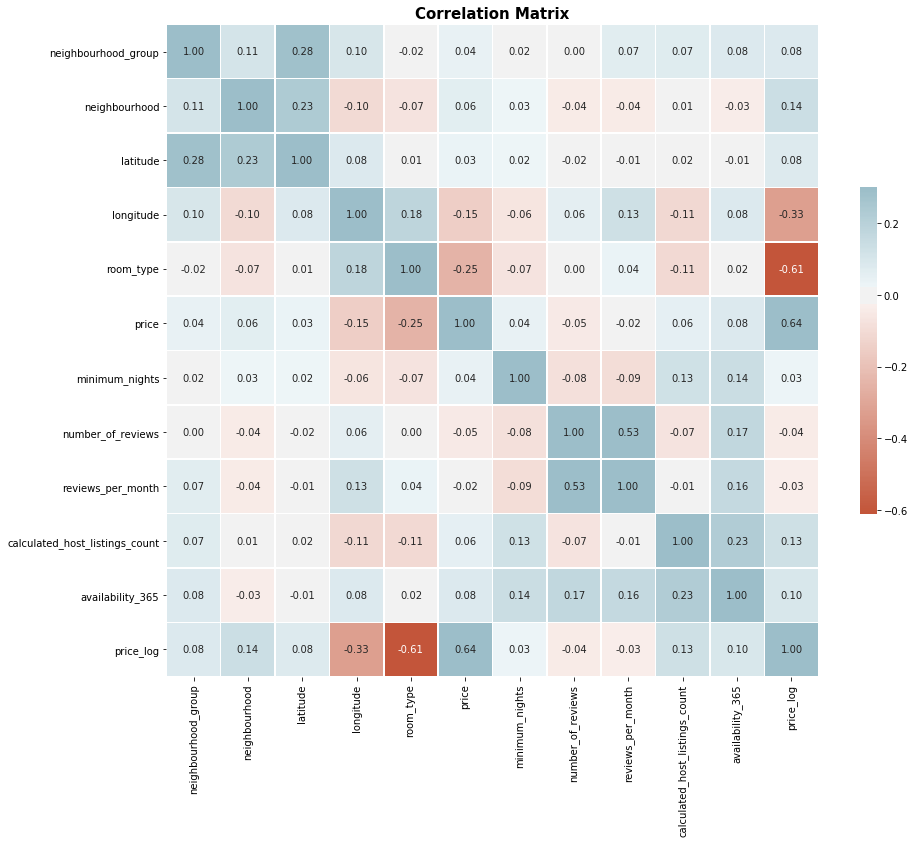

In [0]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(12, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

The variable price is very weak correlated with the other numerical variables.We need to inspect a deeper.

In [0]:
df['price'].groupby(df["neighbourhood_group"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
0,1091.0,87.50,106.71,0.0,45.0,65.0,99.0,2500.0
1,20104.0,124.38,186.87,0.0,60.0,90.0,150.0,10000.0
2,21661.0,196.88,291.38,0.0,95.0,150.0,220.0,10000.0
3,5666.0,99.52,167.10,10.0,50.0,75.0,110.0,10000.0
4,373.0,114.81,277.62,13.0,50.0,75.0,110.0,5000.0




 (0 = Brooklyn,
 1 = Manhattan,
 2 = Queens,
 3 = Staten Island,
 4 = Bronx)

Manhattan is the most expensive region, with price 196.88(since we have logged result seems to differ) as a mean value.

Bronx is the less expensive region, with price 87.50 as a mean value.

In [0]:
df['price'].groupby(df["room_type"]).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
0,25409.0,211.79,284.04,0.0,120.0,160.0,229.0,10000.0
1,22326.0,89.78,160.21,0.0,50.0,70.0,95.0,10000.0
2,1160.0,70.13,101.73,0.0,33.0,45.0,75.0,1800.0


(0 = Private room, 1 = Entire home/apt, 2 = Shared room)


Entire home/apt is the most expensive room type with price 211.79.

Shared Room is the less expansive room type with price 70.13.

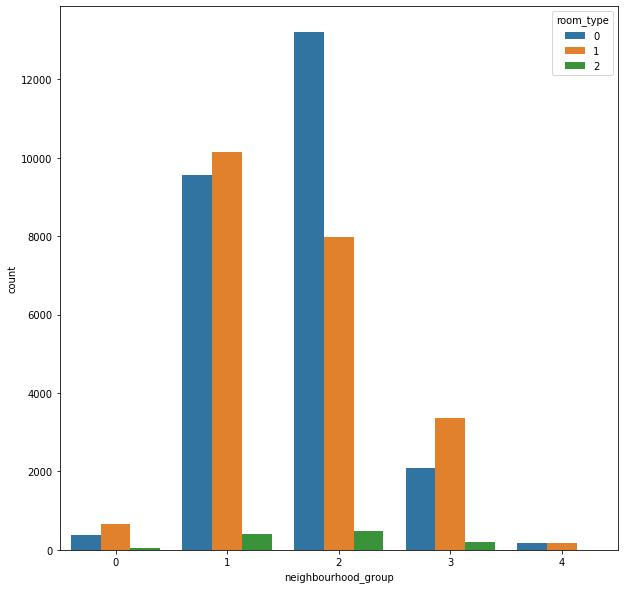

In [0]:
plt.figure(figsize=(10,10))
RoomT_Borough = sns.countplot(df['neighbourhood_group'],hue=df['room_type'])

Plot shows that Entire Home/Apartment are listed most near Manhattan while Private Rooms and Apartments Near Brooklyn are Nearly Equal



##Geo-Spatial Visualization


###Cluster Map of the Hosts

In [0]:
nyc_map = folium.Map(location=[df['latitude'].mean(),df['longitude'].mean()], zoom_start=4)

nyc_map.add_child(FastMarkerCluster(df[['latitude', 'longitude']].values.tolist()))

nyc_map

This map is one of the most important aspect in our project since it allows us to see the locations visually.With a simple look we can see that the largest proportion of the hosts are located in Manhattan.

###Airbnb Room Types in NYC Map
One of the important feature of our data frame is "*room_type*".The map below shows us the distribution of the room types in map of NYC.

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.



(-74.28337047811617, -73.67222994890714, 40.4751445261289, 40.936503645041604)

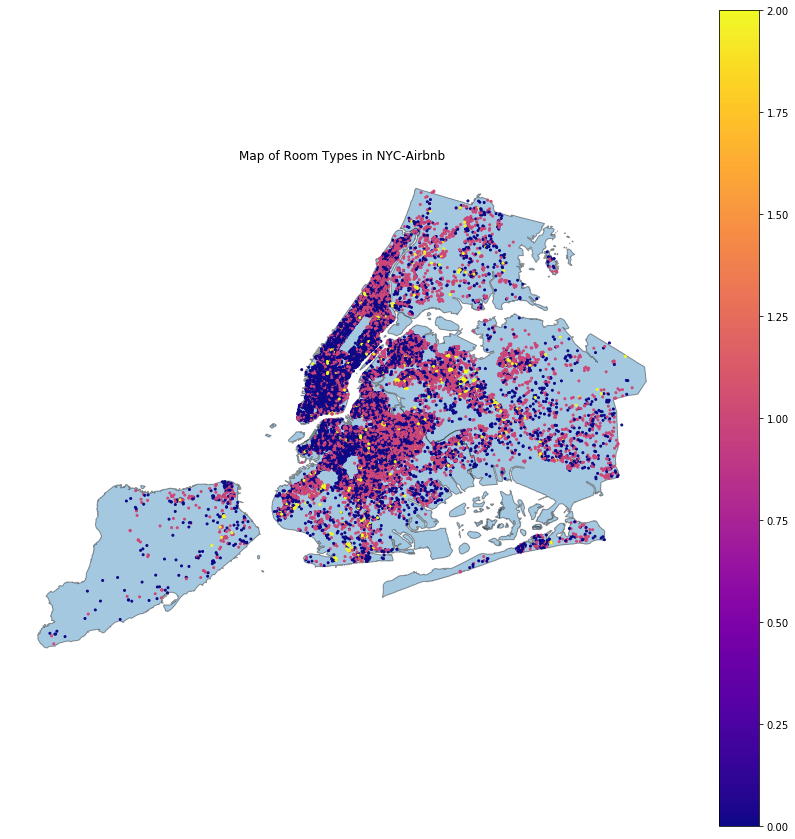

In [0]:
crs = {'init':'epsg:4326'}
geometry = geopandas.points_from_xy(df.longitude, df.latitude)
geo_data = geopandas.GeoDataFrame(df,crs=crs,geometry=geometry)
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='room_type',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Map of Room Types in NYC-Airbnb")
plt.axis('off')

As it can be seen in this map in Manhattan which is counted as the center of the city the number of renting especially the entire apartment is higher. Also in Brooklyn and Bronx the number of renting private rooms can be highlighted. Overall the number of renting is very low in Staten Island. 

### Airbnb Availability Map

In [0]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,geometry
0,1,108,40.64749,-73.97237,1,149,1,9,0.210000,6,365,5.010635,POINT (-73.97237 40.64749)
1,2,127,40.75362,-73.98377,0,225,1,45,0.380000,2,355,5.420535,POINT (-73.98377 40.75362)
2,2,94,40.80902,-73.94190,1,150,3,0,1.373221,1,365,5.017280,POINT (-73.94190 40.80902)
3,1,41,40.68514,-73.95976,0,89,1,270,4.640000,1,194,4.499810,POINT (-73.95976 40.68514)
4,2,61,40.79851,-73.94399,0,80,10,9,0.100000,1,0,4.394449,POINT (-73.94399 40.79851)


(-74.28337047811617, -73.67222994890714, 40.4751445261289, 40.936503645041604)

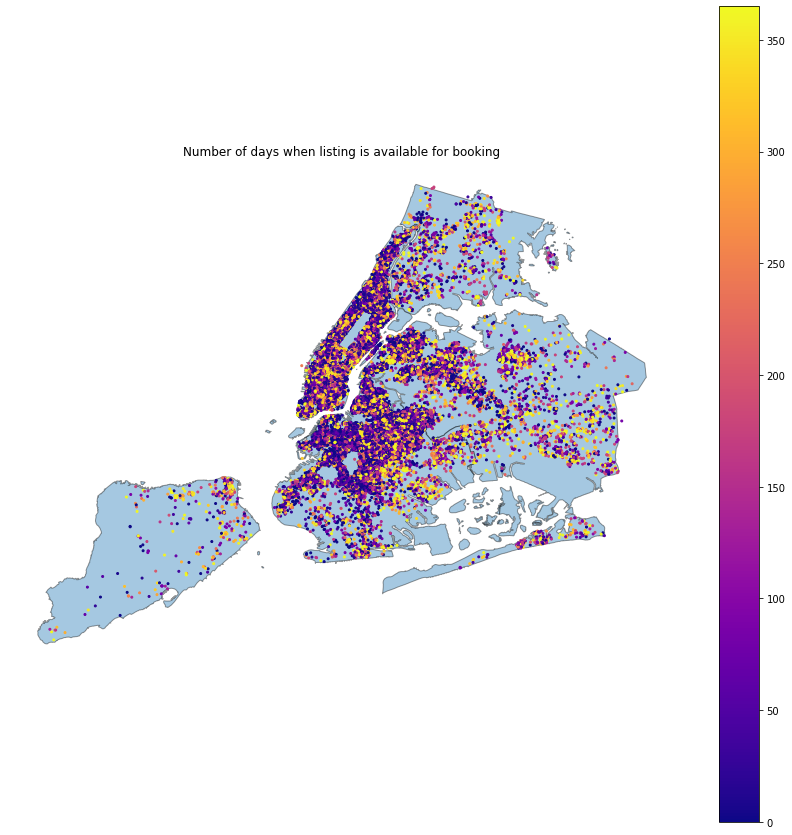

In [0]:
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column="availability_365",ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Number of days when listing is available for booking")
plt.axis('off')

In Brooklyn number of days when listing is available for booking is lower than other neighbourhoods which might be due the fact here are more private rooms to rent in that area.

###Airbnb Host Listings Map

(-74.28337047811617, -73.67222994890714, 40.4751445261289, 40.936503645041604)

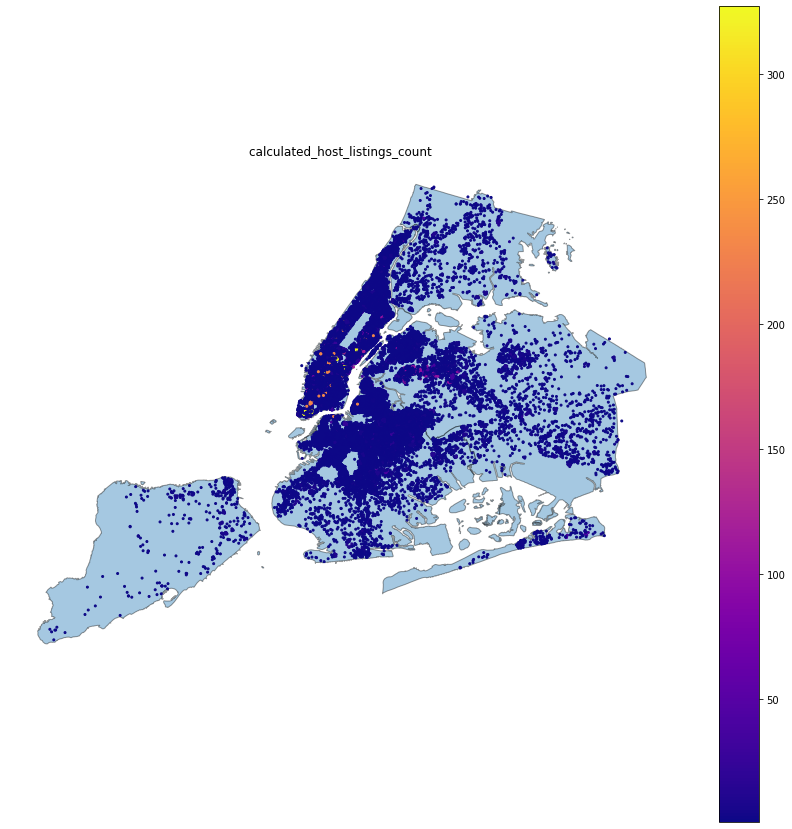

In [0]:
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='calculated_host_listings_count',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("calculated_host_listings_count ")
plt.axis('off')

Calculated host listings does not show an extreme variance.

###NYC-Subway Mapping

What we can go further from here is to map the subway station Entrance and Exit data from https://data.ny.gov/widgets/i9wp-a4ja which is an open  source data.

In [0]:
df_subway.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,NONE,NaN,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


We are not going to work with the routes etc. so unnecessary columns needs to be dropped.

In [0]:
df_subway.drop(columns=list(df_subway.columns)[5:16],inplace=True)
df_subway.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,Stair,YES,NaN,YES,NONE,NaN,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,Stair,YES,NaN,YES,FULL,NaN,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


Data Understanding,Wrangling and Preperation

In [0]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 21 columns):
Division              1868 non-null object
Line                  1868 non-null object
Station Name          1868 non-null object
Station Latitude      1868 non-null float64
Station Longitude     1868 non-null float64
Entrance Type         1868 non-null object
Entry                 1868 non-null object
Exit Only             56 non-null object
Vending               1868 non-null object
Staffing              1868 non-null object
Staff Hours           40 non-null object
ADA                   1868 non-null bool
ADA Notes             75 non-null object
Free Crossover        1868 non-null bool
North South Street    1839 non-null object
East West Street      1833 non-null object
Corner                1836 non-null object
Entrance Latitude     1868 non-null float64
Entrance Longitude    1868 non-null float64
Station Location      1868 non-null object
Entrance Location     1868 non-null obj

Missing Values Needs Handling

In [0]:
df_subway.isnull().sum()

Division                 0
Line                     0
Station Name             0
Station Latitude         0
Station Longitude        0
Entrance Type            0
Entry                    0
Exit Only             1812
Vending                  0
Staffing                 0
Staff Hours           1828
ADA                      0
ADA Notes             1793
Free Crossover           0
North South Street      29
East West Street        35
Corner                  32
Entrance Latitude        0
Entrance Longitude       0
Station Location         0
Entrance Location        0
dtype: int64

The data shows a shape that satisfies our needs so lets drop more of the unnecessary columns that we have.

In [0]:
df_subway.drop(columns=list(df_subway.columns)[5:17],inplace=True)
df_subway.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


Now there is only one problem exists,NYC Subway has 472 stations bt this data contains every entrance as a row which causes 2 main problems,duplicate datas and rendering issue since the data is large so we need to remove duplicates.

In [0]:
df_subway_unique = df_subway.drop_duplicates(['Station Name'], keep='last')
print("Station Number: {}".format(df_subway_unique.shape[0]))

Station Number: 356


We have reduced our dataset so it is time for us to put our markers for the map.

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.



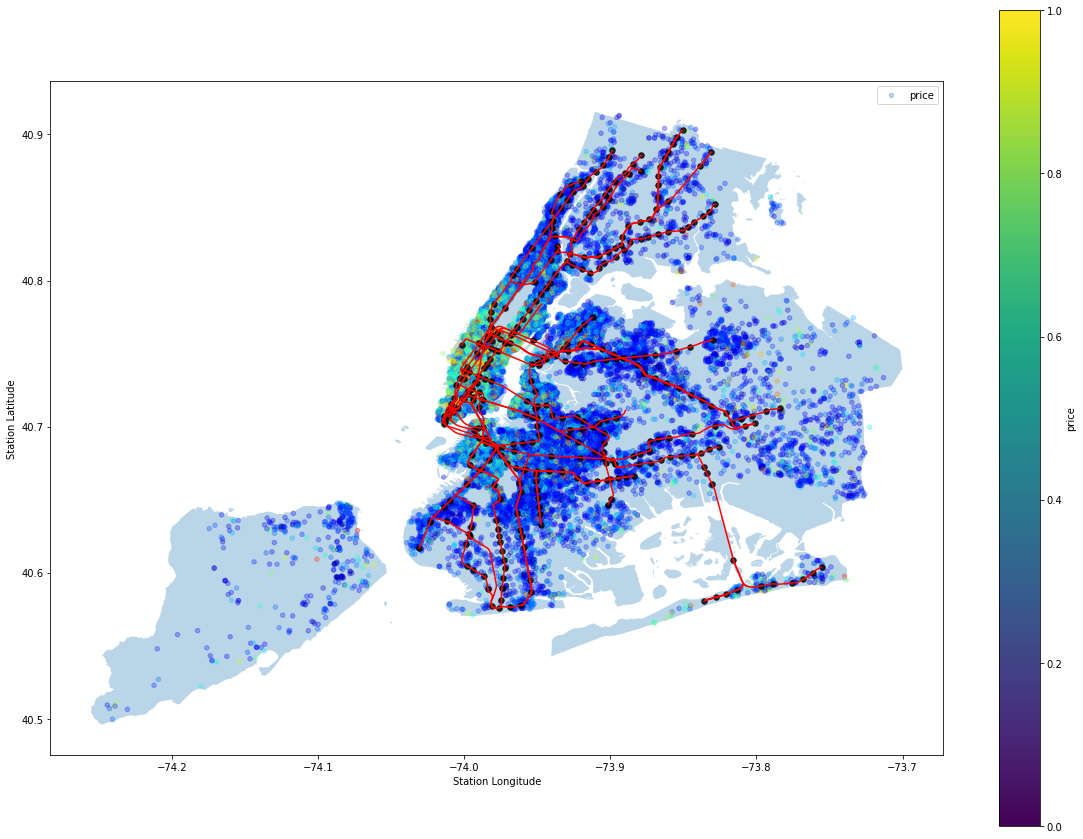

In [0]:

df_sub_gpd = geopandas.read_file('/content/drive/My Drive/Cs210/Subway Lines (1).geojson')

ax_route = df_sub_gpd.plot(color='red')
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)
ax_base = nyc.plot(ax=ax_route,alpha=0.3, figsize=(20,15))
sub_6=df[df.price<500]
ax=sub_6.plot(ax=ax_base,kind='scatter', x='longitude', y='latitude', label='price', c='price',cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.3, figsize=(20,15))

sub_7 = df_subway_unique
sub_7.plot(ax=ax,kind='scatter', x='Station Longitude', y='Station Latitude', alpha=0.8, figsize=(20,15),c='black',s=30,colorbar=False)



Finally,we can see that for Manhattan region,being close to subway showed some affect on "*price*".We can also see that Manhattan contains a large amount of the interstations which might cause an affect on price.

In [0]:
df.drop(columns=["price"],inplace=True)

# Step 5: Modelling Data 


In this step,what we are basically trying to achieve is to select an efficient multivariate ML algorithm which would predict the price with feature sensitively.Why we are choosing such an algorithm is that there are a lot of different parameters which shows importance while obtaining the price such as location, room type, closeness to any public transport.

Repeats for every model:
* Data set to be splitted properly
* Implementation of model
* Hyper Tuning Of Models
<br>
<br>
Here is a graph which could help us to gain an idea about what to do.


<img src=https://scikit-learn.org/stable/_static/ml_map.png>

So before starting blindly, lets use our observations in order to answer these two questions below.
* What is our problem?
  * We want to predict prices.
  * We want to perform a data modeling from information we gathered in order be used for predicting or decision making.
  * Our problem is that our dataset does not show any linear correlation between two features where one of them is price.
  * The problem occurs due to the fact that important features in our data that would create a correlation with price can only be used together.
    * We can not use "*latitude*" and "*longitude*" separetly in order to derive a statistical result.
* What possible ML algorithms can give a solution to our problem ? 
  * It is possible to answer this question with a lot of different appropaches.
      * First of all, after examining the decision map above we know that our problem can be solved using regression, not classification.
      * We can use the regression based ML models for evaluating a better price predicting model but it is necessary to choose the one that shows the best performance.



##Feature Selection and Grid Search

The geometry column prevents us to apply model functions of Machine Learning Algorithms so we are going to drop it.

In [0]:
df = df.drop(columns=["geometry","neighbourhood_group","room_type"])

One other major problem is to select appropiate sizes of x and y values from the data set.The data set would be handled as numpy arrays which would satisfy the necessary size limits.

In [0]:
df_model_x, df_model_y = df.iloc[:,:-1], df.iloc[:,-1]

We apply standardization method in order to normalize the features.

StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. For e.g. an Employee dataset will contain AGE column with values on scale 20-70 and SALARY column with values on scale 10000-80000.

As these two columns are different in scale, they are Standardized to have common scale while building machine learning model.

In [0]:
scaler = StandardScaler()
df_model_x = scaler.fit_transform(df_model_x)

We will split the data with necessary sizes by applying "*train_test_split*".

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_model_x, df_model_y, test_size=0.3,random_state=42)


Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

In [0]:
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=df.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Model Building

After examining the table given by sklearn we have decided to implement 4 Machine Learning Models and observe their behaviour after the implementation in order to find an efficient way to tune it.

We have defined grid searching instances as functions in order to call them later.

###Linear Regression Grid Search Cross Validation

The main goal is to discover the best applicable parameter grid in order build a better model.

In [0]:
def linear_reg(x_valid, y_valid, cv=5):
    
    modelLR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    
    GridSaerchLR = GridSearchCV(estimator=modelLR,param_grid=parameters,scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)


    GridSaerchLR.fit(x_valid, y_valid)
    BestParametersLR = GridSaerchLR.best_params_  
    BestScoreLR = GridSaerchLR.best_score_ 
    print("Best Parameter for Linear Regression:{}".format(BestParametersLR))
    print("Best Score for Linear Regression with parameters:{}".format(BestScoreLR))

linear_reg(df_model_x, df_model_y)

###Ridge Regression Grid Search Cross Validation

In [0]:
def ridge_reg(x,y, cv=5):

    modelRidge= Ridge()

    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    GridSearchRidge = GridSearchCV(estimator=modelRidge,param_grid=(dict(alpha=alphas, normalize= normalizes)),scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)

    ## The best applying parameters are discovered

    GridSearchRidge.fit(x, y)
    BestParametersRidge = GridSearchRidge.best_params_  
    BestScoreRidge = GridSearchRidge.best_score_ 
    print("Best Parameters for Ridge Regression:{}".format(BestParametersRidge))
    print("Best Score for Ridge Regression:{}".format(BestScoreRidge))
    
ridge_reg(df_model_x, df_model_y)

### Lasso Regression Grid Search Cross Validation

It is known that Lasso Regression performs some extra process in order to evaluate a better model.We are not using this algorithm by fully knowing its abilities since some of these algorithms shows very extreme abilities.Our main goal is to perform the specified grid search algorithm in order to find an optimal way to use it. 

In [0]:
### Lasso Regression ###

def lasso_reg(x, y, cv=5):
    ## Defining parameters
    modelLasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    GridSearchLasso = GridSearchCV(estimator=modelLasso,param_grid=(dict(alpha=alphas, normalize= normalizes)),scoring='neg_mean_squared_error', cv=cv,n_jobs=-1)

    ## Lastly, finding the best parameters.

    GridSearchLasso.fit(x, y)
    BestParametersLasso = GridSearchLasso.best_params_  
    BestScoreLasso = GridSearchLasso.best_score_ 
    print("Best Parameters for Lasso Regression:{}".format(BestParametersLasso))
    print("Best Score for Lasso Regression:{}".format(BestScoreLasso))

lasso_reg(df_model_x, df_model_y)

###ElasticNet Regression Grid Search Cross Validation

In [0]:
### ElasticNet Regression ###

def elastic_reg(x, y,cv=5):
    ## Defining parameters
    modelElastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    GridSearchElastic = GridSearchCV(estimator=modelElastic,param_grid=(dict(alpha=alphas, normalize= normalizes)),scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)

    ## Lastly, finding the best parameters.

    GridSearchElastic.fit(x, y)
    BestParameterElastic = GridSearchElastic.best_params_  
    BestScoreElastic = GridSearchElastic.best_score_ 
    print("Best Parameters for ElasticNet Regression:{}".format(BestParameterElastic))
    print("Best Score for ElasticNet Regression:{}".format(BestScoreElastic))

elastic_reg(df_model_x, df_model_y)

In regression results, if the correlation coefficient is negative, it provides statistical evidence of a negative relationship between the variables. The increase in the first variable will cause the decrease in the second variable. We'll go back to have a look at literature review to possible explanations and rationales

K-Fold Cross Validation

In [0]:
kfold_cv=KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in kfold_cv.split(df_model_x,df_model_y):
    X_train, X_test = df_model_x[train_index], df_model_x[test_index]
    y_train, y_test = df_model_y[train_index], df_model_y[test_index]

Polynomial Features

In [0]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

Prediction

In [0]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#Ridge Model
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 

#ElasticNet Model
model_enet = ElasticNet(alpha = 0.01, normalize=False)
model_enet.fit(X_train, y_train) 
pred_test_enet= model_enet.predict(X_test)

##Model Comparison

In [0]:
print('Linear Regression Performance Metrics')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

print('Ridge Regression Performance Metrics')
print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

print('Lasso Regression Performance Metrics')
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))



print('ElasticNet Regression Performance Metrics')
print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_enet))


From the current observation we have done all of the regression models showed performance close to each other causing a confusion in order to decide and choose a better algorithm for further operations.

The main problem is that in order to decide which algorithm to choose there are 2 possible options exists.We can choose to manually try all possible combinations of hyperparameter tuning for all algorithms or we can conduct a more detailed research on the data to whether find a better feature engineering option.

We have conducted a research on the data about subway stations.We can implement a function which can calculate the distance of the closest subway station and add it as another feature.After this implementation a positive correlation between price and the added feature can be found.

Another approach could be to drop the negatively correlated features and find and add positively correlated features. 

#Step 6:Conclusion

After conducting several tests and implementing specific Machine Learning Algorithms there are some specific facts are discovered.

  1. It can be concluded that Manhattan contains most of the listings which is not suprising since it is the city center of NYC.

  2. It has been also examined that the demand for Manhattan house listings can be correlated with the Subway system since Manhattan plays a role as heart of the city and contains a lot of interstation beneath.It is also a central place if you choose to use Subway as your daily tranport routine.

  3. We have also applied a research on the distribution of the highest priced room_type with regard to neighbourhood which maintained a lot different ranged information.

  4. After EDA step, Linear Regression Machine Learning models were implemented and examined for the appropriate hyperparameters in order to find an accurate model to apply.Our examination was routed by the important aspects of the Machine Learning Models and their abilities.Finally we have concluded that all the models applied showed almost the same performance.
      * Feature Importances are calculated.
      * Hyperparameter Tuning is applied and optimal parameters are used.
      * Performance metrics are calculated.

  5. By all means it can be stated out due to our research that in order to build a more selective algorithm, an enhanced feature engineering is necessary such as NLP.The names of the listings can be examined in order to find a correlation.

All group members contributed in each step equally.